## STAT 201 Project Proposal


Felix Ma 22972558

Kerie Galvez 83812586

Xinrui Wang 93514867 

### Canada Population Aging Problem Research

### Introduction

Population aging refers to the change in composition of a population by increasing the number and proportion of the elderly. However, in recent years, population aging has become a global concern. Shifts in the distribution of a country’s population towards older ages may lead to declines in fertility rates and increases in average life expectancy, as well as labour shortages and increases in government social security burden (Yoshino & Miyamoto, 2017). In Canada, the government, funding agencies, researchers, and health and social care providers are all grappling with the challenge of population aging (Ries, 2010). In this project, we aim to answer the following question: “Is there a significant difference between the proportion of older people (ages 65 or older) in the population of Canada between 2011 and 2016?” The proportion of older people will be used as the location parameter. To help answer our question, we will be using the dataset retrieved from Statistic Canada (Government of Canada, 2019). This dataset includes notable variables such as the age in single years and average age, and the total number of male and female individuals in each age group. The dataset can also be categorized by selecting to only include individuals of a certain province/city or by selecting to include the entire population of Canada.


### Method and Results

In this project, we will using the dataset from Statistic Canada which include 2011 and 2016 Canada population information for our research. Data is obtained from the website directly, the data reading and wrangling process shown below:

In [26]:
### loading the packages
library(tidyverse)
library(dplyr)
library(repr)
library(digest)
library(infer)

In [27]:
### reading the data
url_2011 <- "https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/File.cfm?S=0&LANG=E&A=R&PID=109523&GID=1235625&D1=1&D2=0&D3=0&D4=0&D5=0&D6=0&OFT=CSV"
raw_2011 <- read_csv(url_2011, skip=4)
colnames(raw_2011) <- c("age", "total", "male", "female", "na")
ages <- as.character(0:100)
raw_2011[4,1] <- "0"
raw_2011[126,1] <- "100"
cleaned_2011_data <- raw_2011 %>%
                     select(1:4) %>%
                     filter(age %in% ages)
dat_2011 <- transform(cleaned_2011_data, age=as.numeric(age))
url_2016 <- "https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/File.cfm?S=0&LANG=E&A=R&PID=109523&GID=1235625&D1=0&D2=0&D3=0&D4=0&D5=0&D6=0&OFT=CSV"
raw_2016 <- read_csv(url_2016, skip=4)
colnames(raw_2016) <- c("age", "total", "male", "female", "na")
ages <- as.character(0:100)
raw_2016[4,1] <- "0"
raw_2016[126,1] <- "100"
cleaned_2016_data <- raw_2016 %>%
                     select(1:4) %>%
                     filter(age %in% ages)
dat_2016 <- transform(cleaned_2016_data, age=as.numeric(age))

New names:
* `` -> ...5

Warning message:
"One or more parsing issues, see `problems()` for details"
Rows: 130 Columns: 5

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Age (in single years) and average age (127)
dbl (3): Total - Sex, Male, Female
lgl (1): ...5


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

New names:
* `` -> ...5

Warning message:
"One or more parsing issues, see `problems()` for details"
Rows: 130 Columns: 5

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Age (in single years) and average age (127)
dbl (3): Total - Sex, Male, Female
lgl (1): ...5


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [28]:
### data wrangling
combined_dat <- dat_2011 %>%
             left_join(dat_2016, by="age")
colnames(combined_dat) <- c("age", "total_2011", "male_2011", "female_2011", "total_2016", "male_2016", "female_2016")
combined_dat <- combined_dat %>% select(age, total_2011, total_2016)
combined_new <- combined_dat%>%
                pivot_longer(cols= total_2011:total_2016,
                             values_to="pop",
                             names_to="year")
obs_2016<- tibble(obs_2016=rep(0:100, dat_2016$total))
obs_2011<- tibble(obs_2011=c(rep(0:100, dat_2011$total), rep(NA, 1675085)))
obs_2011_noNA <- tibble(obs_2011_noNA=rep(0:100, dat_2011$total))
obs <- tibble(obs_2011, obs_2016)
obs_new <- obs %>%
           pivot_longer(cols= everything(),
                        names_to = "year",
                        values_to = "dat")

First of all, the boxplot below show that 2011 and 2016 Canada has the similar age distribution, but the median age in 2016 is a little higher than the 2011 median age.

Warning message:
"Removed 1675085 rows containing non-finite values (stat_boxplot)."


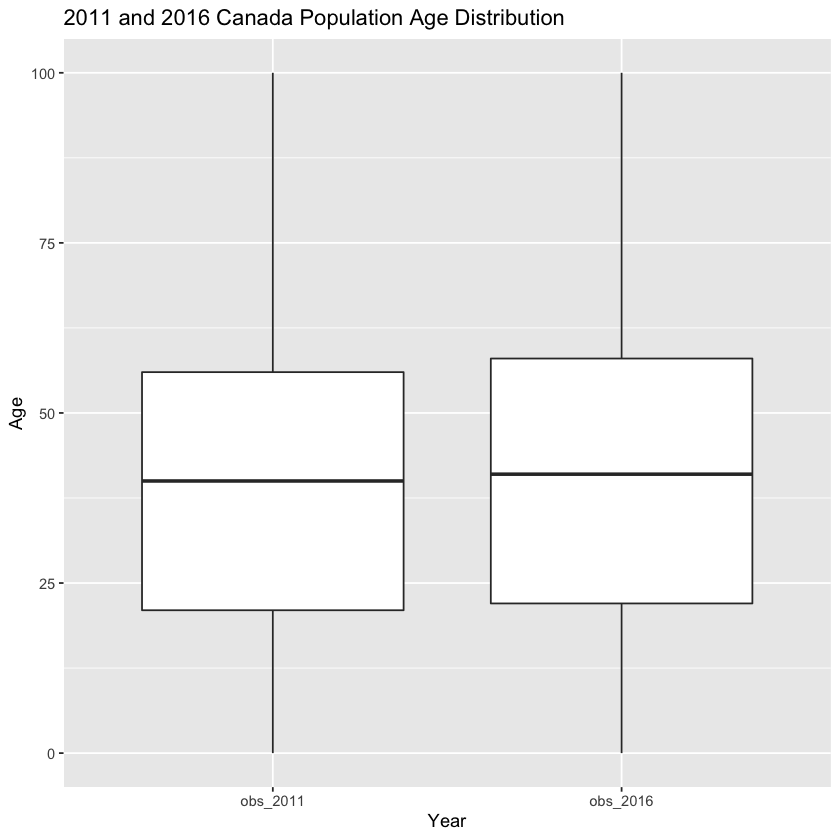

In [29]:
### Boxplots to compare data distribution between 2011 and 2016
box <- obs_new %>%
       ggplot(aes(x=year, y=dat))+
       geom_boxplot()+
       labs(x="Year", y="Age")+
       ggtitle("2011 and 2016 Canada Population Age Distribution")
box

The Population distribution below show that the 2016 population distribution is a little right shift of the 2011 population distribution, so it indicates that 2016 population has a general larger age than 2011 population.

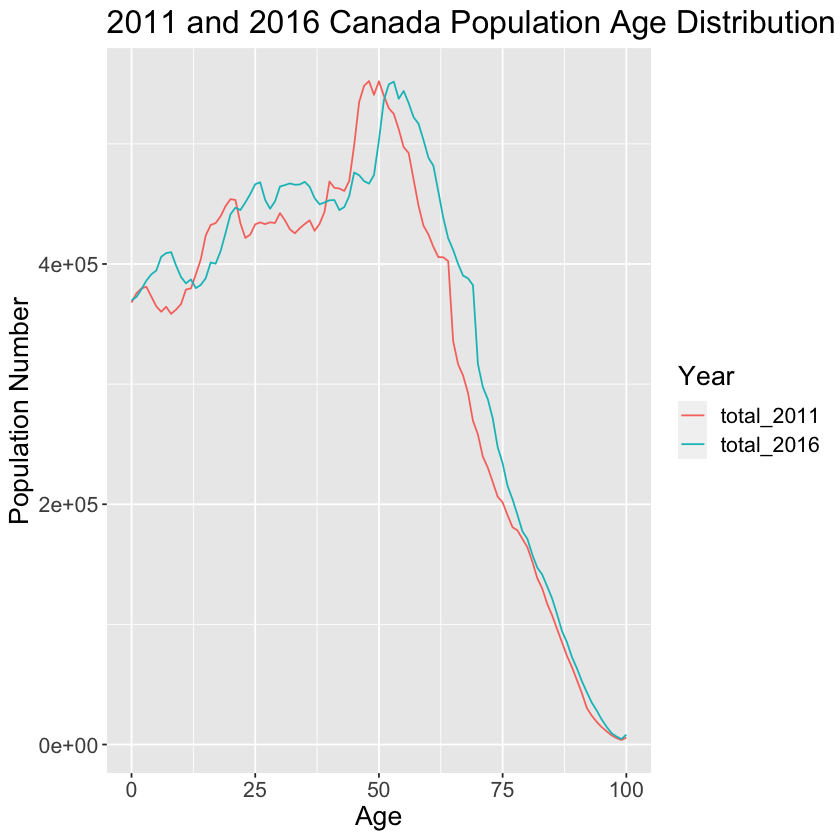

In [30]:
### Population distribution between 2011 and 2016
dist_aging <- combined_new %>%
              ggplot(aes(x=age, y=pop, group = year, color = year)) +
              geom_line()+
              labs(x="Age", y="Population Number", col="Year")+
              theme(text = element_text(size=16))+
              ggtitle("2011 and 2016 Canada Population Age Distribution")
dist_aging

As the proportion of the people aged over 65 in a country is defined as the index of aging problem, so we made the bootstrap sampling with sample size 3000 (it is about 0.0001 of the population) and repeat 10000 times, then calculate the propportion of people aged over 65 in the sample. Then, we graph the sampling distribution of the proportion of people aged over 65 in 2011 and 2016.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



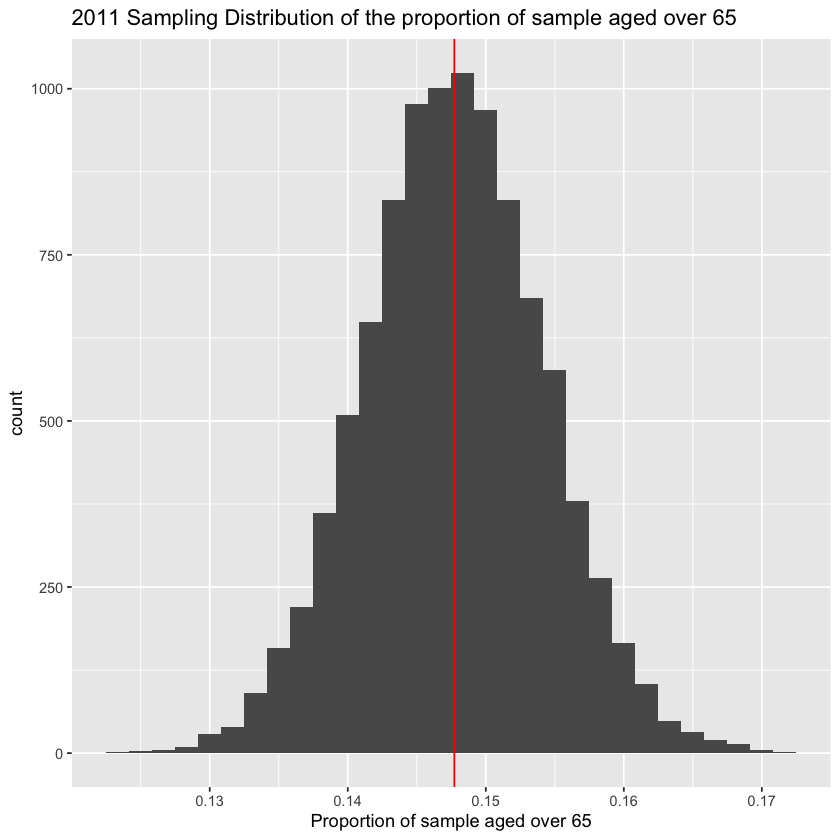

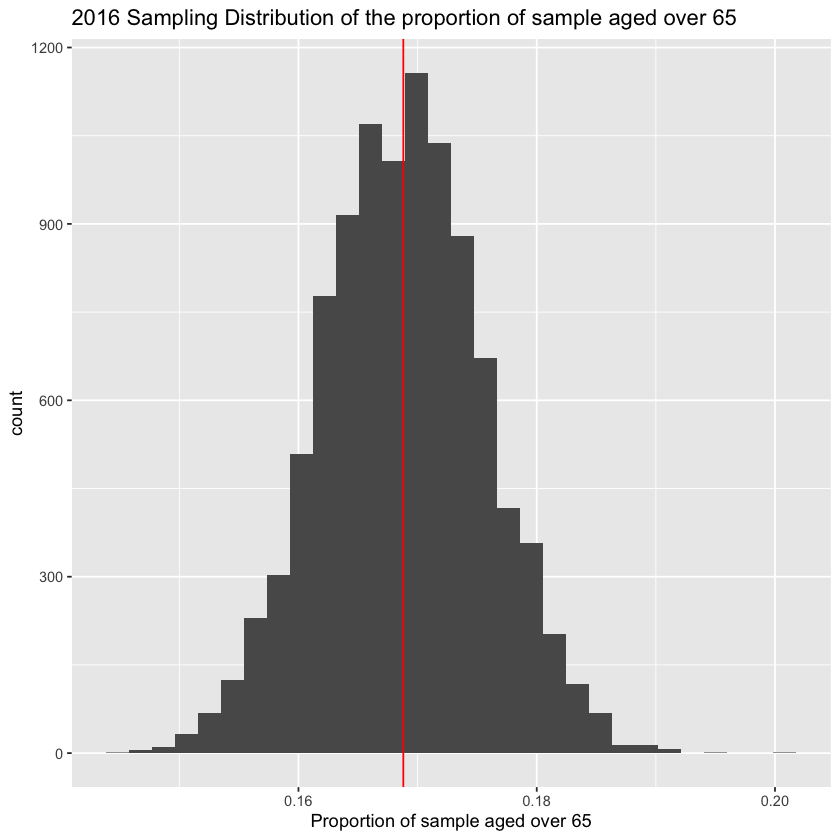

In [42]:
### bootstrap 2011
set.seed(123)
boot_2011_sample <- rep_sample_n(obs_2011_noNA, size=3000, replace = TRUE, rep=10000) %>%
                    group_by(replicate) %>%
                    summarise(prop_over_65 = mean(obs_2011_noNA >=65))
boot_2011_dist <- boot_2011_sample %>%
                ggplot(aes(x = prop_over_65)) +
                geom_histogram() +
                xlab("Proportion of sample aged over 65") +
                ggtitle("2011 Sampling Distribution of the proportion of sample aged over 65")+
                geom_vline(xintercept=mean(boot_2011_sample$prop_over_65), col="red")
boot_2011_dist
### bootstrap 2016
boot_2016_sample <- rep_sample_n(obs_2016, size=3000, replace = TRUE, rep=10000) %>%
                    group_by(replicate) %>%
                    summarise(prop_over_65 = mean(obs_2016 >=65))
boot_2016_dist <- boot_2016_sample %>%
                ggplot(aes(x = prop_over_65)) +
                geom_histogram() +
                xlab("Proportion of sample aged over 65") +
                ggtitle("2016 Sampling Distribution of the proportion of sample aged over 65")+
                geom_vline(xintercept=mean(boot_2016_sample$prop_over_65), col="red")
boot_2016_dist


As can be seen from the graphs above, the two sampling distributions are all bell-shaped, the 2011 sampling distribution seems centered at around 0.15, the 2016 sampling distribution seems centered around 0.17. This indicates that 2016 has a higher proportion of the people aged over 65. However, if we want to confirm this, we need to do a hypothesis test as well.

We made the hypothesis test below:

Null Hypothesis: 2011 and 2016 has the same proportion of the people aged over 65.

Alternative Hypothesis: 2016 has the higher proportion of the people aged over 65.

This is a one-sided two sample t test:


In [32]:
### Hypothesis Testing
hytest <- t.test(x = boot_2016_sample$prop_over_65, 
           y = boot_2011_sample$prop_over_65, 
           paired = FALSE,
           alternative = 'greater')
hytest


	Welch Two Sample t-test

data:  boot_2016_sample$prop_over_65 and boot_2011_sample$prop_over_65
t = 224.94, df = 19951, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.02092707        Inf
sample estimates:
mean of x mean of y 
0.1688013 0.1477201 


From the summary above, we found that the test statistic is 224.94, the p-value is extremely small which means we have strong evidence to reject the null hypothesis, so 2016 has the higher proportion of the people aged over 65 than 2011. The 95% confidence interval for the difference is [0.0209,Inf]

In [33]:
### Asymptotics Analysis
set.seed(123)
asy_sample2011_300 <- rep_sample_n(obs_2011_noNA, size=300, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2011 = mean(obs_2011_noNA >= 65))
asy_sample2011_3000 <- rep_sample_n(obs_2011_noNA, size=3000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2011 = mean(obs_2011_noNA >= 65))
asy_sample2011_30000 <- rep_sample_n(obs_2011_noNA, size=30000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2011 = mean(obs_2011_noNA >= 65))

In [34]:
set.seed(123)
asy_sample2016_300 <- rep_sample_n(obs_2016, size=300, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2016 = mean(obs_2016 >= 65))
asy_sample2016_3000 <- rep_sample_n(obs_2016, size=3000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2016 = mean(obs_2016 >= 65))
asy_sample2016_30000 <- rep_sample_n(obs_2016, size=30000, replace = FALSE, rep=10000) %>%
           group_by(replicate) %>%
           summarise(prop_over_65_2016 = mean(obs_2016 >= 65))

In [35]:
sample_estimates300 <- asy_sample2011_300 %>%
             left_join(asy_sample2016_300, by="replicate")
sample_estimates3000 <- asy_sample2011_3000 %>%
             left_join(asy_sample2016_3000, by="replicate")
sample_estimates30000 <- asy_sample2011_30000 %>%
             left_join(asy_sample2016_30000, by="replicate")

In [36]:
sample300_dist <- sample_estimates300 %>%
  ggplot(group=year) +
  geom_histogram(aes(x = prop_over_65_2016, color="2016"),fill = "blue", bins=30, alpha=0.2) +
  geom_histogram(aes(x = prop_over_65_2011, color="2011"),fill = "red", bins=30, alpha=0.2) +
  xlab("Proportion of aged over 65") +
  ggtitle("Sample Size 300")+
  geom_vline(xintercept=mean(sample_estimates300$prop_over_65_2016), color="blue")+
  annotate("text", x=mean(sample_estimates300$prop_over_65_2016), y=-20, label="mean = 0.168955", color="blue")+
  geom_vline(xintercept=mean(sample_estimates300$prop_over_65_2011), color="red")+
  annotate("text", x=mean(sample_estimates300$prop_over_65_2011), y=-60, label="mean = 0.147556", color="red")+
  scale_color_manual(name='Year',
                     breaks=c('2011', "2016"),
                     values=c('2011'='red', '2016'='blue'))              

In [37]:
sample3000_dist <- sample_estimates3000 %>%
  ggplot(group=year) +
  geom_histogram(aes(x = prop_over_65_2016, color="2016"),fill = "blue", bins=30, alpha=0.2) +
  geom_histogram(aes(x = prop_over_65_2011, color="2011"),fill = "red", bins=30, alpha=0.2) +
  xlab("Proportion of aged over 65") +
  ggtitle("Sample Size 3000")+
  geom_vline(xintercept=mean(sample_estimates3000$prop_over_65_2016), color="blue")+
  annotate("text", x=mean(sample_estimates3000$prop_over_65_2016), y=-20, label="mean = 0.1688237", color="blue")+
  geom_vline(xintercept=mean(sample_estimates3000$prop_over_65_2011), color="red")+
  annotate("text", x=mean(sample_estimates3000$prop_over_65_2011), y=-60, label="mean = 0.1477228", color="red")+
  scale_color_manual(name='Year',
                     breaks=c('2011', "2016"),
                     values=c('2011'='red', '2016'='blue'))   

In [38]:
sample30000_dist <- sample_estimates30000 %>%
  ggplot(group=year) +
  geom_histogram(aes(x = prop_over_65_2016, color="2016"),fill = "blue", bins=30, alpha=0.2) +
  geom_histogram(aes(x = prop_over_65_2011, color="2011"),fill = "red", bins=30, alpha=0.2) +
  xlab("Proportion of aged over 65") +
  ggtitle("Sample Size 30000")+
  geom_vline(xintercept=mean(sample_estimates30000$prop_over_65_2016), color="blue")+
  annotate("text", x=mean(sample_estimates30000$prop_over_65_2016), y=-20, label="mean = 0.1688276", color="blue")+
  geom_vline(xintercept=mean(sample_estimates30000$prop_over_65_2011), color="red")+
  annotate("text", x=mean(sample_estimates30000$prop_over_65_2011), y=-60, label="mean = 0.1477175", color="red")+
  scale_color_manual(name='Year',
                     breaks=c('2011', "2016"),
                     values=c('2011'='red', '2016'='blue'))

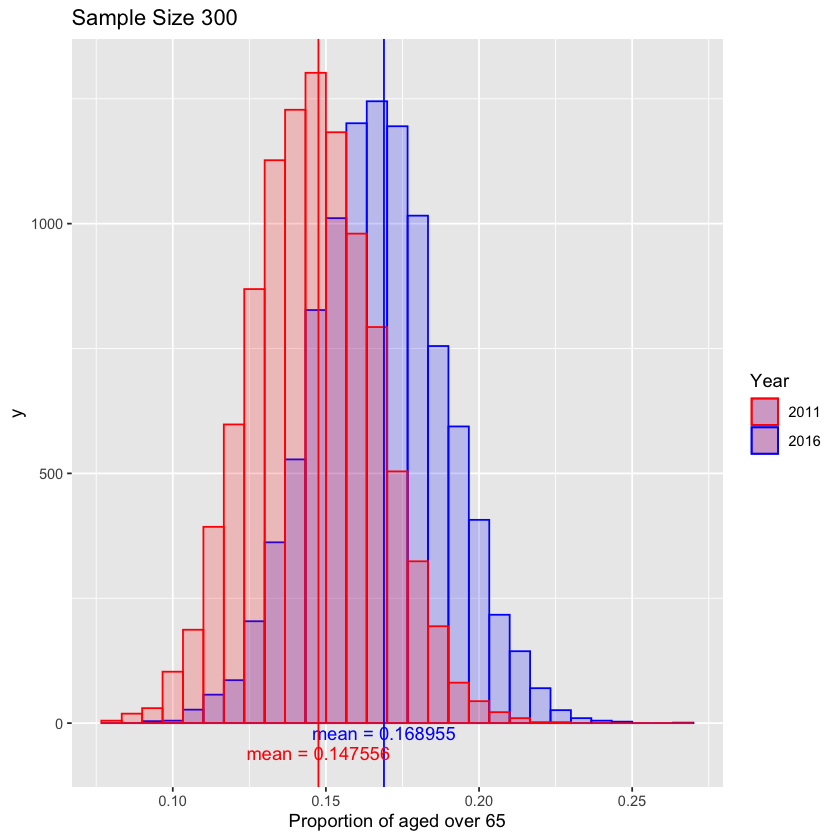

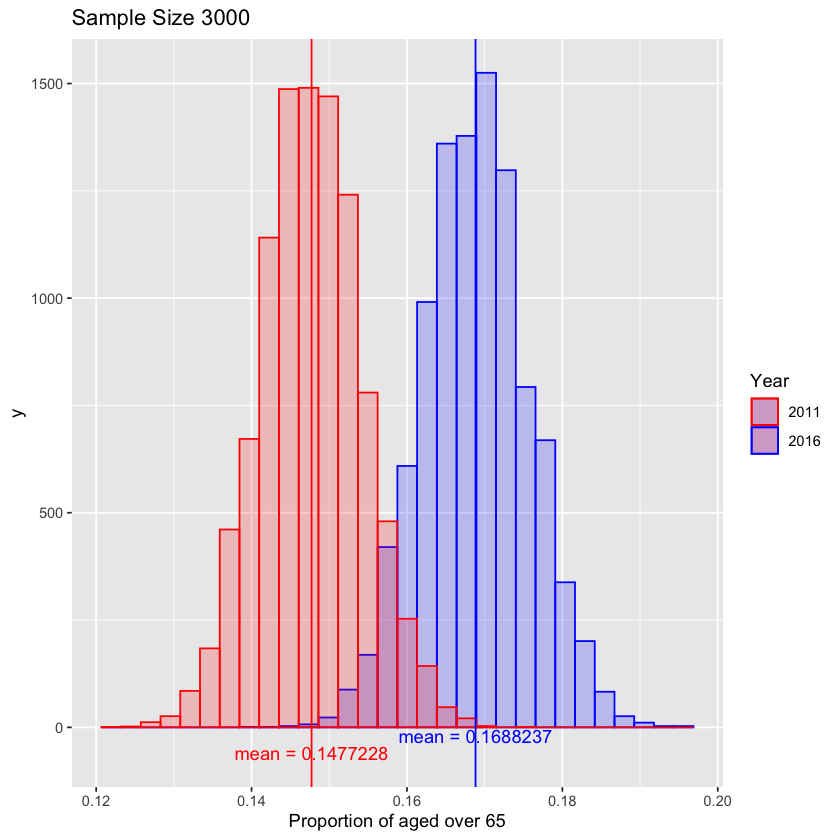

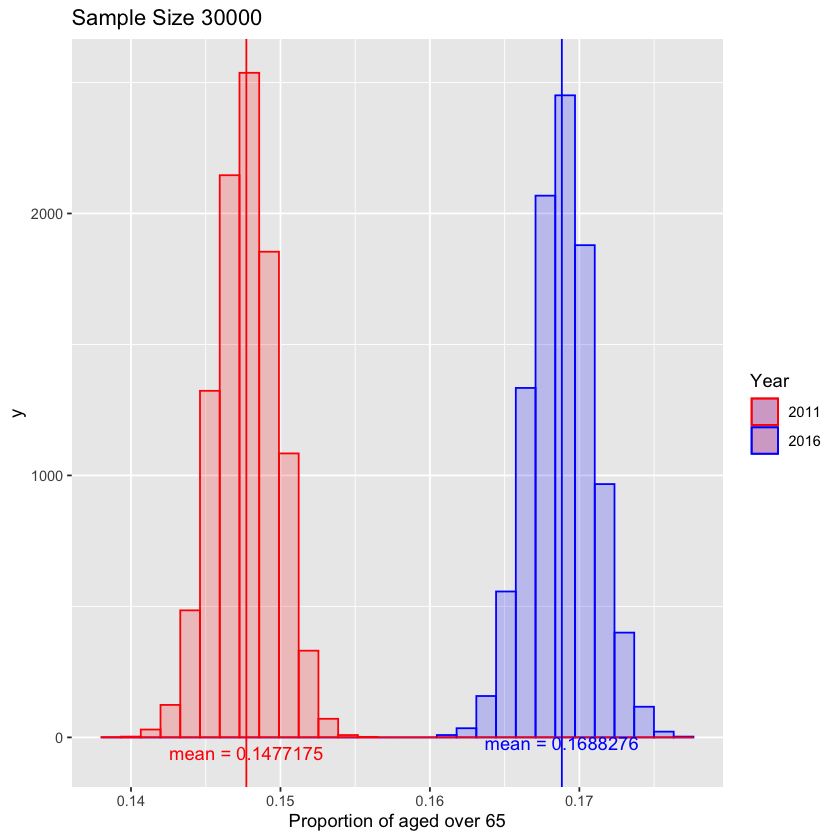

In [39]:
sample300_dist
sample3000_dist
sample30000_dist

In [40]:
sd_table <- tibble(sample_size=c(300,3000,30000),
        sd_prop65_2011 = c(sd(sample_estimates300$prop_over_65_2011),
                              sd(sample_estimates3000$prop_over_65_2011),
                              sd(sample_estimates30000$prop_over_65_2011)),
        sd_prop65_2016 = c(sd(sample_estimates300$prop_over_65_2016),
                              sd(sample_estimates3000$prop_over_65_2016),
                              sd(sample_estimates30000$prop_over_65_2016)))
sd_table

sample_size,sd_prop65_2011,sd_prop65_2016
<dbl>,<dbl>,<dbl>
300,0.020373881,0.021436457
3000,0.006499147,0.006813989
30000,0.002057749,0.002166935


As can be seen from the graph and table above, when the sample size is increasing, the standard deviation is decreasing for each sample. The sampling distribution become narrower. The 2011 and 2016 sampling distribution also become less overlapped as the sample size increasing. This indicates that when the sample size increasing, stronger evidence pointed out that 2016 has higher proportion of people aged over 65 than 2011.

By comparing the Bootstrap sampling method and the asymptotics method, they all give strong evidence to indicating that 2016 Canadian proportion of people aged over 65 is larger than the proportion in 2011. As the total Canada population is over 30,000,000. so I think the sample size 3000 used in the bootstrapping method may not enough representative. The Asymptotics method has 3 different sample size (300, 3000, 30000) which may be better to show the different proportion of people aged over 65 in Canada.

### References

- Government of Canada, S. C. (2019, June 17). Data Tables, 2016 census. 2016 Census Data tables – Age (in Single Years) and Average Age (127) and Sex (3) for the Population of Canada, Provinces and Territories, Census Metropolitan Areas and Census Agglomerations, 2016 and 2011 Censuses - 100% Data. https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?TABID=2&LANG=E&A=R&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=01&GL=-1&GID=1235625&GK=1&GRP=1&O=D&PID=109523&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2016&THEME=115&VID=0&VNAMEE=&VNAMEF=&D1=1&D2=0&D3=0&D4=0&D5=0&D6=0


- Ries, N. M. (2010). Canadian institutes of health research -- institute of aging: Profile: Ethics,    health research, and canada's aging population. Canadian Journal on Aging, 29(4), 577-580.



- Yoshino, N., & Miyamoto, H. (2017). Declined effectiveness of fiscal and monetary policies faced with aging population in Japan. Japan and the World Economy, 42, 32–44. https://doi.org/10.1016/j.japwor.2017.06.002 